[0.89090909]
[0.99090909]
[1.12390909]
[1.29353909]
Implicit euler method
step	ti	yi	exact
0	0.0	1.0	1.0
1	0.1	1.13	1.1155
2	0.2	1.2963	1.2642
3	0.3	1.5029	1.4496
4	0.4	1.7542	1.6755


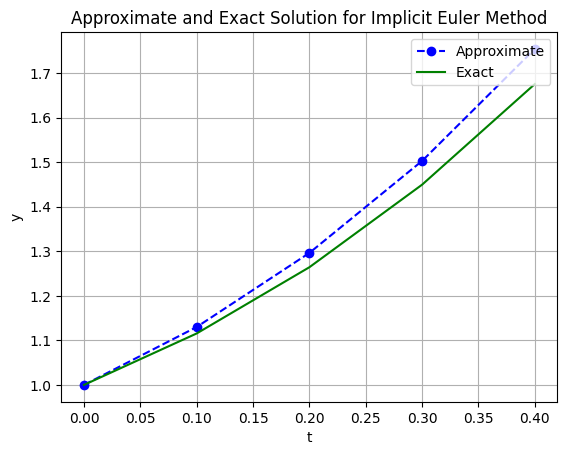

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

class Euler:
    __n: int
    __h: float
    __a: float
    __b: float
    __t0: float
    __y0: float
    __f: any
    __t: float = []
    __y: float = []
    __exact: any
    __e: float = []
    
    def __init__(self, n: int, b: float, t0: float, y0: float, f: any, exact: any, h: float = 0):
        self.__n =  n
        self.__a = t0
        self.__b = b
        if h == 0:
            self.__h = (self.__b - self.__a) / (n - 1)
        else:
            self.__h = h
        self.__t0 = t0
        self.__y0 = y0
        self.__f = f
        self.__t = np.zeros(self.__n + 1)
        self.__y = np.zeros(len(self.__t))
        self.__t[0] = self.__t0
        self.__y[0] = self.__y0
        self.__exact = exact
        
    def implicit_method(self):
        for i in range(0, self.__n):
            self.__t[i + 1] = self.__t0 + self.__h * (i + 1)
            
            ye = self.__y[i] + self.__h * self.__f(self.__t[i], self.__y[i])
            
            func_eq = lambda y: y - self.__y[i] + self.__h * self.__f(self.__t[i + 1], y) 
            
            print(fsolve(func_eq, self.__y[i]))
            
            self.__y[i + 1] = self.__y[i] + self.__h * self.__f(self.__t[i + 1], ye)
        
        self.__e = self.__exact(self.__t)
            
        self.__Printing("Implicit")
        self.__DrawGraph("Implicit")
        
    def explicit_method(self):
        for i in range(0, self.__n):
            self.__t[i + 1] = self.__t0 + self.__h * (i + 1)
            
            self.__y[i + 1] = self.__y[i] + self.__h * self.__f(self.__t[i], self.__y[i])
        
        self.__e = self.__exact(self.__t)

        self.__Printing("Explicit")
        self.__DrawGraph("Explicit")
        
    def __Printing(self, type: str):
        print(type, "euler method", sep=" ")
        print("==============================")
        print("step", "ti", "yi", "exact", sep="\t")
        for idx, num in enumerate(self.__t):
            print(idx, round(num, 4), round(self.__y[idx], 4), round(self.__e[idx],4), sep="\t")
        
    def __DrawGraph(self, type: str):
        self.__t = np.array(self.__t)
        plt.plot(self.__t, self.__y, 'bo--', label='Approximate')
        plt.plot(self.__t, self.__e, 'g', label="Exact")
        plt.title('Approximate and Exact Solution for ' + type + ' Euler Method')
        plt.xlabel('t')
        plt.ylabel('y')
        plt.grid()
        plt.legend(loc='upper right')
        plt.show()

''' euler: Euler = Euler(n=10, h=0.1, b=2, t0=1, y0=-1, f=lambda t, y: (1 / (t * t) - y / t - (y * y)), exact=lambda t: -1 / t)
euler.explicit_method()

euler2: Euler = Euler(n=10, h=0.1, b=1, t0=0, y0=-1, f=lambda t, y: np.exp(-t), exact=lambda t: -np.exp(-t))
euler2.explicit_method() '''

''' euler3: Euler = Euler(n=5, h=0.1, b=2, t0=1, y0=1, f=lambda t, s: 2 * t, exact=lambda t: np.power(t, 2) )
euler3.explicit_method()
euler3.implicit_method()

euler4: Euler = Euler(n=10, h=0.3, b=4, t0=0, y0=1, f=lambda t, y: -2 * t * y, exact=lambda t: np.exp(-np.power(t, 2)))
euler4.explicit_method() 
 
euler5: Euler = Euler(n=10, h=0.1, b=1, t0=0, y0=1, f=lambda t, y: t + y, exact=lambda t: -t -1 + 2 * np.exp(t))
euler5.explicit_method()
euler5.implicit_method() '''

''' euler6: Euler = Euler(n=20, b=5, t0=0, y0=1, f=lambda t, y: -np.power(y, 2), exact=lambda t: 1 / (t + 1))
euler6.explicit_method()
euler6.implicit_method() '''

euler6: Euler = Euler(n=4, h=0.1, b=0.4, t0=0, y0=1, f=lambda t, y: (2 * t) + y, exact=lambda t: (-2) * (t + 1) + 3 * np.exp(t))
#euler6.explicit_method()
euler6.implicit_method()


humps_backward_euler():
  Solve the humps ODE system using backward_euler().
[0.  0.1 0.2 0.3 0.4 0.5]
[[1.        ]
 [1.13333333]
 [1.3037037 ]
 [1.51522634]
 [1.77247371]
 [2.08052634]]


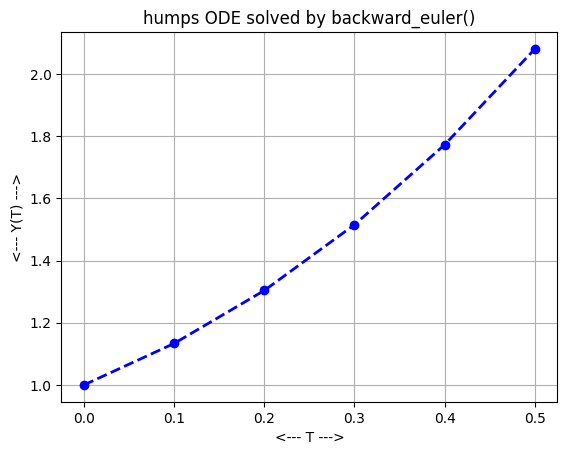

In [32]:
def backward_euler(f, tspan, y0, n):
  from scipy.optimize import fsolve
  import numpy as np

  if (np.ndim(y0) == 0):
    m = 1
  else:
    m = len(y0)

  t = np.zeros(n + 1)
  y = np.zeros([n + 1, m])

  #dt = (tspan[1] - tspan[0]) / float(n)
  dt = 0.1

  t[0] = tspan[0]
  y[0, :] = y0

  for i in range(0, n):

    to = t[i]
    yo = y[i, :]
    tp = t[i] + dt
    yp = yo + dt * f(to, yo)

    yp = fsolve(backward_euler_residual, yp, args=(f, to, yo, tp))

    t[i+1] = tp
    y[i+1, :] = yp[:]

  return t, y


def backward_euler_residual(yp, f, to, yo, tp):
  value = yp - yo - (tp - to) * f(tp, yp)

  return value


def backward_euler_test():
  import numpy as np

  tspan = np.array([0.0, 1.0])
  y0 = 1
  n = 5
  humps_backward_euler(tspan, y0, n)

  return


def humps_backward_euler(tspan, y0, n):
  import matplotlib.pyplot as plt
  import numpy as np

  print('')
  print('humps_backward_euler():')
  print('  Solve the humps ODE system using backward_euler().')

  t, y = backward_euler(humps_deriv, tspan, y0, n)
  print(t)
  print(y)

  plt.clf()

  plt.plot(t, y, 'bo--', linewidth=2)
  plt.grid(True)
  plt.xlabel('<--- T --->')
  plt.ylabel('<--- Y(T) --->')
  plt.title('humps ODE solved by backward_euler()')
  plt.show(block=False)
  plt.close()

  return

def humps_deriv(x, y):
  yp = (2 * x) + y

  return yp

if (__name__ == '__main__'):
  backward_euler_test()


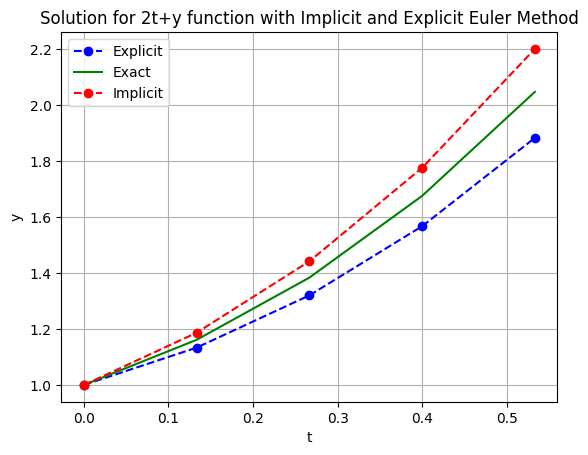

In [33]:
import numpy as np
import matplotlib.pyplot as plt

class Euler:
    __n: int
    __h: float
    __a: float
    __b: float
    __t0: float
    __y0: float
    __f: any
    __t: float = []
    __y: float = []
    __exact: any
    __e: float = []

    def __init__(self, n: int, b: float, t0: float, y0: float, f: any, exact: any, h: float = 0):
        self.__n = n
        self.__a = t0
        self.__b = b
        if h == 0:
            self.__h = (self.__b - self.__a) / (n - 1)
        else:
            self.__h = h
        self.__t0 = t0
        self.__y0 = y0
        self.__f = f
        self.__t = np.zeros(self.__n + 1)
        self.__y = np.zeros(len(self.__t))
        self.__y2 = np.zeros(len(self.__t))
        self.__t[0] = self.__t0
        self.__y[0] = self.__y0
        self.__y2[0] = self.__y0
        self.__exact = exact
        
        self.implicit_method()
        self.explicit_method()
        self.__DrawGraph()

    def implicit_method(self):
        for i in range(0, self.__n):
            self.__t[i + 1] = self.__t0 + self.__h * (i + 1)

            ye = self.__y[i] + self.__h * self.__f(self.__t[i], self.__y[i])

            self.__y[i + 1] = self.__y[i] + \
                self.__h * self.__f(self.__t[i + 1], ye)

        self.__e = self.__exact(self.__t)

    def explicit_method(self):
        for i in range(0, self.__n):
            self.__t[i + 1] = self.__t0 + self.__h * (i + 1)
            self.__y2[i + 1] = self.__y2[i] + self.__h * \
                self.__f(self.__t[i], self.__y2[i])

        self.__e = self.__exact(self.__t)

    def __DrawGraph(self):
        self.__t = np.array(self.__t)
        plt.plot(self.__t, self.__y2, 'bo--', label='Explicit')
        plt.plot(self.__t, self.__e, 'g', label="Exact")
        plt.plot(self.__t, self.__y, 'ro--', label="Implicit")
        plt.title(
            loc="center", label="Solution for 2t+y function with Implicit and Explicit Euler Method")
        plt.xlabel('t')
        plt.ylabel('y')
        plt.grid()
        plt.legend(loc='upper left')
        plt.show()


euler6: Euler = Euler(n=4, b=0.4, t0=0, y0=1, f=lambda t, y: (
    2 * t) + y, exact=lambda t: (-2) * (t + 1) + 3 * np.exp(t))
